In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


def load_data():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
    column_names = ["class", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing",
                    "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring",
                    "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color",
                    "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
    return pd.read_csv(url, names=column_names)




In [16]:
def explore_habitat_distribution(data):
    habitat_distribution = pd.crosstab(data['habitat'], data['class'])
    print(habitat_distribution)


In [17]:
def convert_to_dummies(data):
    data_dummies = pd.get_dummies(data, drop_first=True)  # drop_first for å unngå dummy variable trap
    print(data_dummies.head())  # Viser topp 5 rader av datasettet etter konvertering
    return data_dummies  # Viser topp 5 rader av datasettet etter konvertering

In [19]:
def visualize_with_tsne(data_dummies):
    tsne = TSNE(n_components=2, random_state=42)
    tsne_results = tsne.fit_transform(data_dummies)

    data_dummies['tsne-2d-one'] = tsne_results[:, 0]
    data_dummies['tsne-2d-two'] = tsne_results[:, 1]

    plt.figure(figsize=(10, 6))
    sns.scatterplot(
        x='tsne-2d-one', y='tsne-2d-two',
        hue='class_p',
        data=data_dummies,
        palette={True: "red", False: "green"},
        alpha=0.8
    )
    plt.title('2D t-SNE visualization of feature space')

    # Adding custom legend
    legend_labels = ['Edible (False)', 'Poisonous (True)']
    plt.legend(title='Class', labels=legend_labels)

    plt.show()

class       e     p
habitat            
d        1880  1268
g        1408   740
l         240   592
m         256    36
p         136  1008
u          96   272
w         192     0
   class_p  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
0     True        False        False        False        False         True   
1    False        False        False        False        False         True   
2    False        False        False        False        False        False   
3     True        False        False        False        False         True   
4    False        False        False        False        False         True   

   cap-surface_g  cap-surface_s  cap-surface_y  cap-color_c  ...  \
0          False           True          False        False  ...   
1          False           True          False        False  ...   
2          False           True          False        False  ...   
3          False          False           True        False  ...   
4    

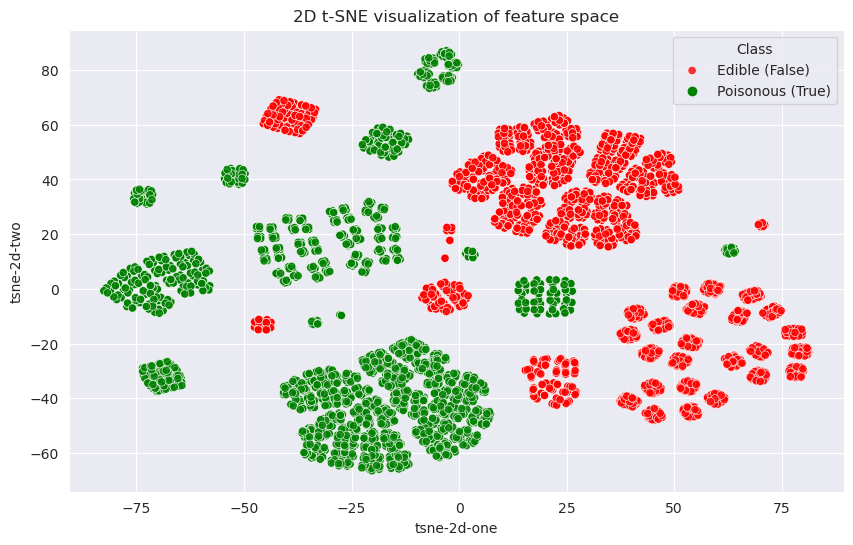

In [20]:
def main():
    data = load_data()
    explore_habitat_distribution(data)
    data_dummies = convert_to_dummies(data)
    visualize_with_tsne(data_dummies)


if __name__ == '__main__':
    main()